In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('platoon_sizes_ploeg.csv', delimiter='\t')
data = data.sort_values(by=['time'])
data.head()

,event,time,node,configname,repetition,platoon_size
265,13288,38.989658,Highway.node[0].appl,SimpleHighNumberPLOEG,3,2
484,12561,39.063184,Highway.node[0].appl,SimpleHighNumberPLOEG,6,2
375,12731,39.275412,Highway.node[0].appl,SimpleHighNumberPLOEG,5,2
343,13775,40.110830,Highway.node[0].appl,SimpleHighNumberPLOEG,4,2
8,13313,40.714057,Highway.node[0].appl,SimpleHighNumberPLOEG,0,2


In [10]:
total_number_of_maneuvers_per_repetition = [0]*10
for index, row in data.iterrows():
    total_number_of_maneuvers_per_repetition[row['repetition']] += 1
    

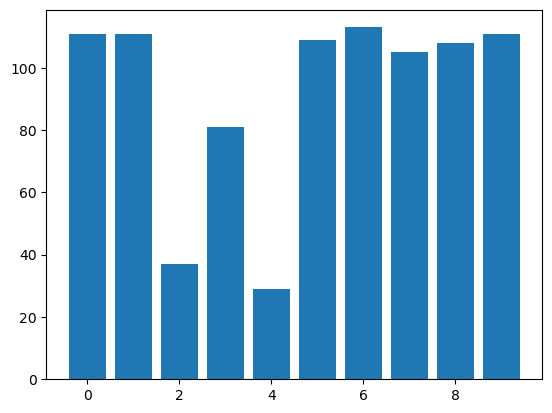

In [11]:
# Maneuvers per repetition - PLOEG
plt.bar(x=list(range(0, len(total_number_of_maneuvers_per_repetition))), height=total_number_of_maneuvers_per_repetition)
plt.show()

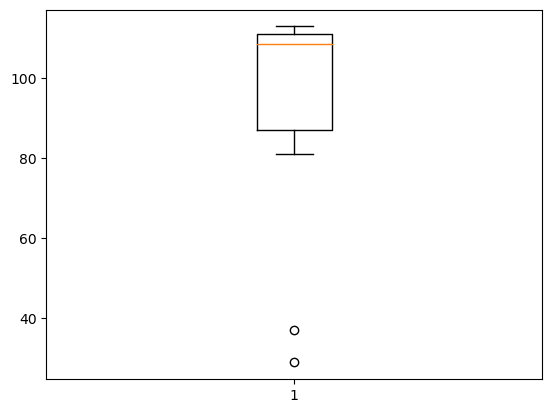

In [12]:
box = plt.boxplot(total_number_of_maneuvers_per_repetition)
plt.title('')
plt.show()

In [13]:
platoon_size_by_leader = {}
for index, row in data.iterrows():
    if row['repetition'] != 5:
        continue
        
    if row['node'] not in platoon_size_by_leader:
        platoon_size_by_leader[row['node']] = {"x": [0], "y": [0]}
        
    platoon_size_by_leader[row['node']]["x"].append(row['time']-1)
    platoon_size_by_leader[row['node']]["x"].append(row['time'])
    
    platoon_size_by_leader[row['node']]["y"].append(platoon_size_by_leader[row['node']]["y"][-1])
    platoon_size_by_leader[row['node']]["y"].append(row['platoon_size'])


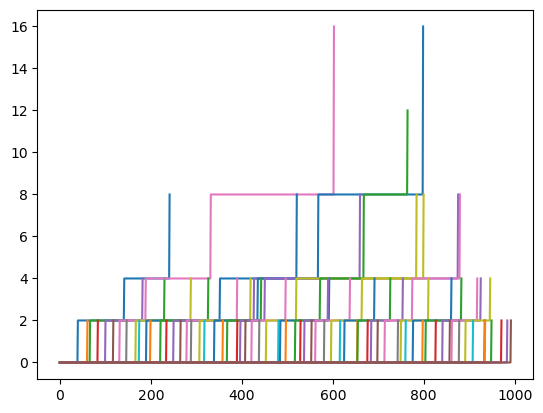

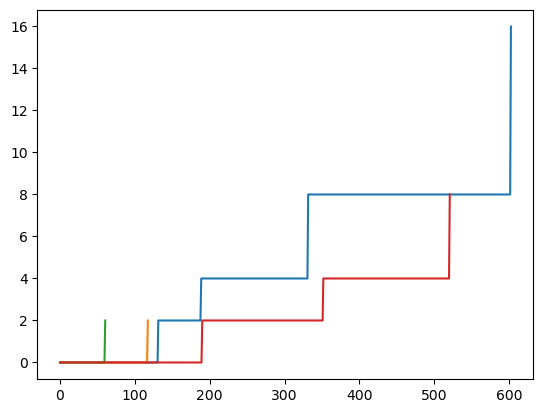

In [28]:
for k in platoon_size_by_leader.keys():
    plt.plot(platoon_size_by_leader[k]["x"], platoon_size_by_leader[k]["y"])
plt.show()

detail = [6, 5, 1, 10]
for i in detail:
    plt.plot(platoon_size_by_leader[list(platoon_size_by_leader.keys())[i]]["x"], platoon_size_by_leader[list(platoon_size_by_leader.keys())[i]]["y"])
    
plt.show()

In [36]:
data = pd.read_csv('platoon_sizes_cacc.csv', delimiter='\t')
data = data.sort_values(by=['time'])
data.head()

,event,time,node,configname,repetition,platoon_size
213,25808,53.989655,Highway.node[0].appl,SimpleHighNumberCACC,3,2
394,23534,54.063204,Highway.node[0].appl,SimpleHighNumberCACC,6,2
344,24174,54.275465,Highway.node[0].appl,SimpleHighNumberCACC,5,2
268,25856,55.110785,Highway.node[0].appl,SimpleHighNumberCACC,4,2
4,24154,55.714158,Highway.node[0].appl,SimpleHighNumberCACC,0,2


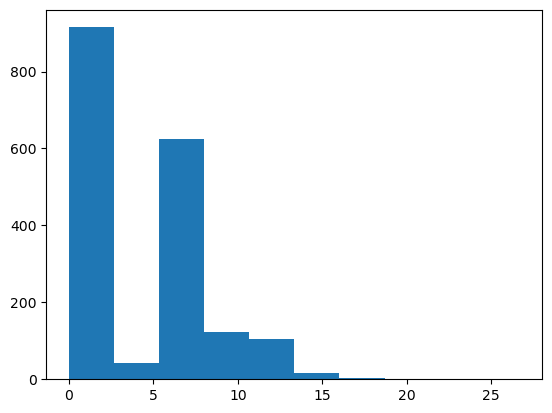

In [32]:
plt.hist(data["platoon_size"])
plt.show()